# 데이터 다운로드 및 업로드
healthcare-dataset-stroke-data.csv 파일을 다운로드 받기
https://www.kaggle.com/fedesoriano/stroke-prediction-dataset
1. 데이터 로딩
2. EDA
    - 피처간 상관관계 보기
    - 카운트 플랏
3. 데이터 전처리
    - 불필요한 Feature 제거
    - 결측치 처리
    - 문자열 데이터 숫자로 인코딩
4. 머신러닝 모델 만들기
    - 학습/테스트 데이터 준비하기
    - 학습모델 학습하기
5. 성능평가
    - 모델 테스트하기
    - 성능 평가하기

In [1]:
# warning 무시
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.shape

(5110, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## 불필요한 feature 제거

In [7]:
df = df.drop('id', axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## EDA(탐색적 데이터 분석)
- 데이터 통계량 확인하기
- 데이터의 특징 파악하기
- feature들 간의 상관관계
- feature와 target과의 관계에서 어떤 특징들이 있는지 탐색하기

In [8]:
# 수치형 데이터 통계량 확인하기
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### 테이블 데이터 통계 확인 

In [9]:
# 범주형 데이터 컬럼 리스트 추출
cat_columns = df.select_dtypes(exclude=np.number).columns.to_list()
cat_columns

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [10]:
# 수치형 데이터 컬럼 리스트 추출
num_columns = df.select_dtypes(include=np.number).columns.to_list()
num_columns

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

In [11]:
# 문자형 데이터 통계 확인
df[cat_columns].describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [12]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [14]:
# 수치형 데이터 기초 통계 확인
df[num_columns].describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [15]:
df.head(3)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


## 데이터 시각화로 탐색하기 

<Axes: xlabel='gender', ylabel='count'>

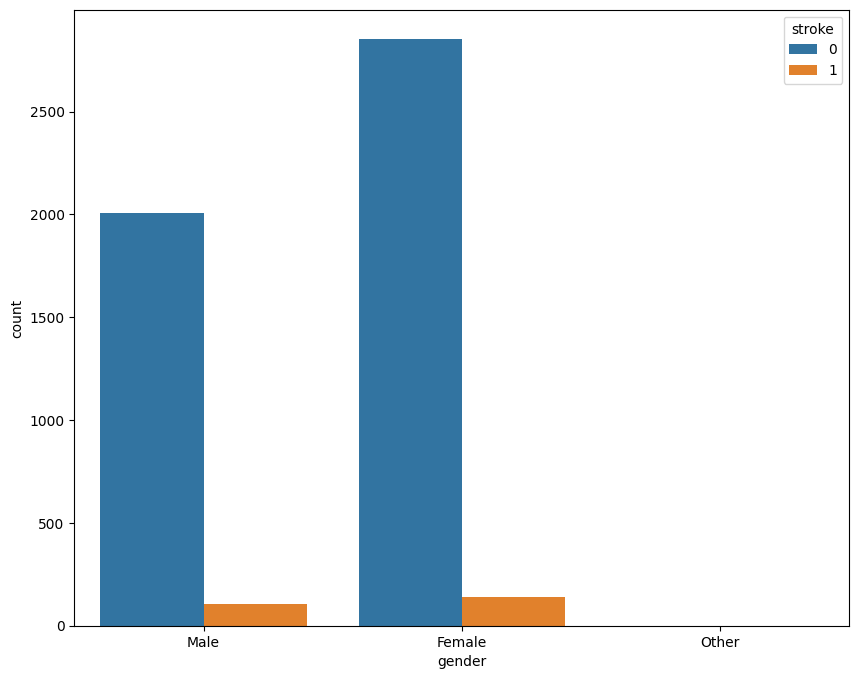

In [16]:
# 성별에 따른 stroke의 0. 1 환자수 카운트 시각화 
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='gender', hue='stroke')

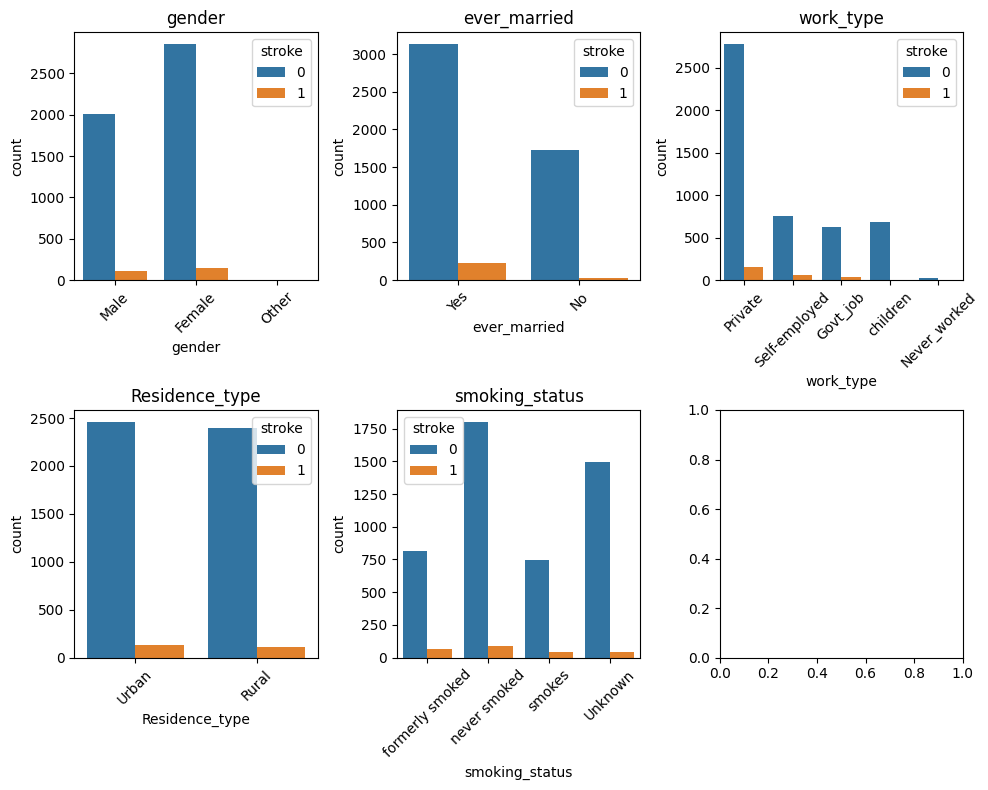

In [17]:
# 문자형 데이터 개별 값과 stroke와의 관계 확인하기
nrows, ncols = 2, 3
figure, axs = plt.subplots(nrows=nrows, ncols=ncols);
figure.set_size_inches(10,8)
axs = axs.flatten()

for i, col in enumerate(cat_columns):
    fig = sns.countplot(data=df, x=col, hue='stroke', ax=axs[i])
    fig.set_title(col)
    plt.setp(fig.get_xticklabels(), rotation=45)  # x축 레이블 각도 조절

plt.tight_layout()
plt.show()

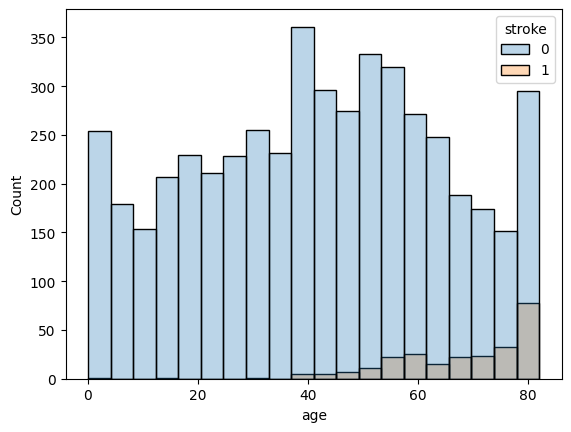

In [18]:
# 나이와 stroke과의 관계 확인하기(histplot())
sns.histplot(data=df, x='age', hue='stroke', alpha=0.3);

In [19]:
df['bmi'].count()

np.int64(4909)

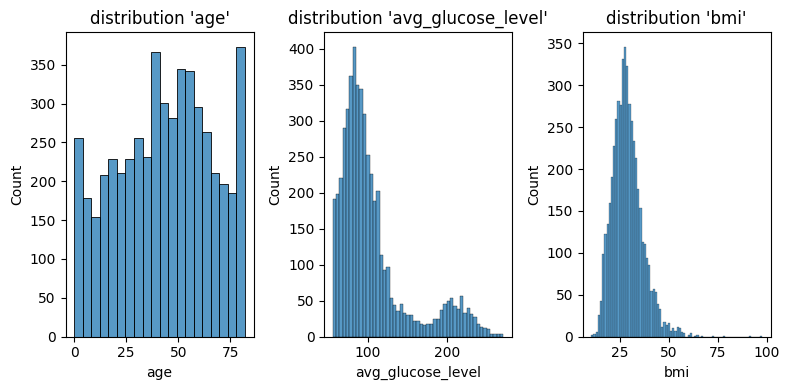

In [20]:
# sns.histplot()으로, 수치형 데이터의 분포 알아보기
num_columns_g = ['age', 'avg_glucose_level', 'bmi']
nrows, ncols = 1, 3
figure, axs = plt.subplots(nrows=nrows, ncols=ncols)
figure.set_size_inches(8,4)
ax_list = axs.flatten()

for i, col in enumerate(num_columns_g):
    fig = sns.histplot(data=df, x=df.loc[:, col], ax=axs[i])
    fig.set_title(f"distribution '{col}'")
    
plt.tight_layout()
plt.show()

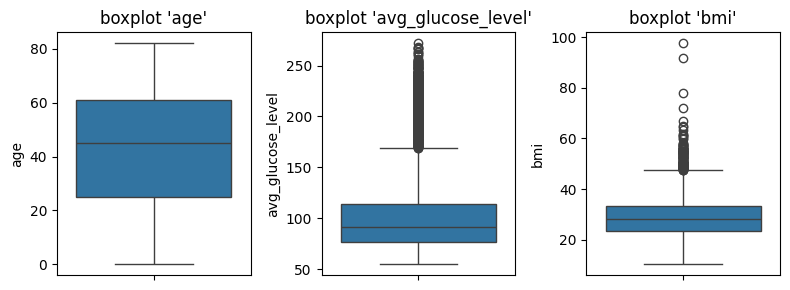

In [21]:
# 통계량은 boxplot으로 살펴보고, sns.boxplots() 활용
nrows, ncols = 1, 3
figure, axs = plt.subplots(nrows=nrows, ncols=ncols)
figure.set_size_inches(8,3)
axs = axs.flatten()

for i, col in enumerate(num_columns_g):
    fig = sns.boxplot(data=df, y=col,  ax=axs[i])
    fig.set_title(f"boxplot '{col}'")
    
plt.tight_layout()
plt.show()

In [22]:
nums_df = df[num_columns]
corr = nums_df.corr()

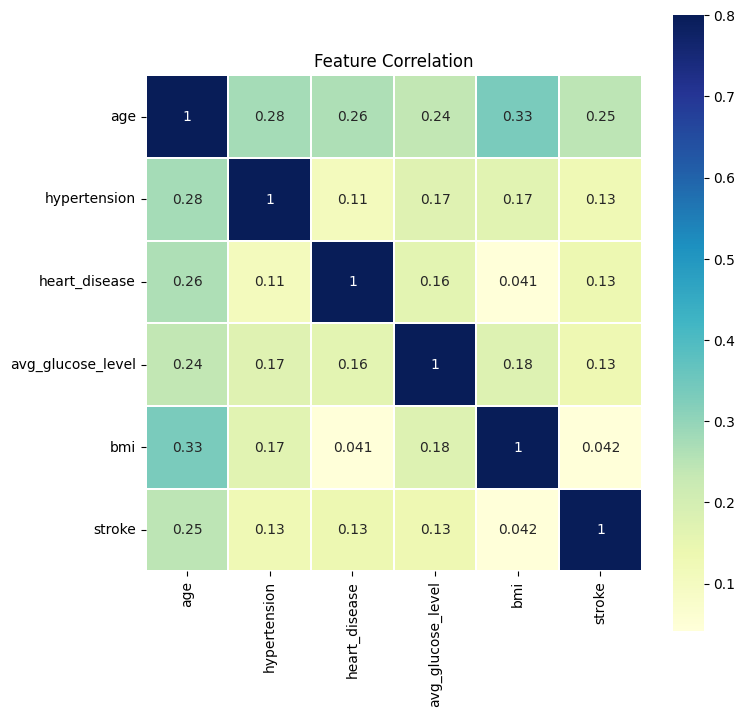

In [23]:
# 피처들간의 상관관계 살펴보기
plt.figure(figsize=(8, 8));
sns.heatmap(corr,
            vmax=0.8,
            linewidths=0.01,
            square=True,
            annot=True,
            cmap='YlGnBu');
plt.title('Feature Correlation');

## 결측치 처리하기

In [24]:
# 결측데이터 확인하기
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [25]:
# 결측 데이터 처리
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


## 문자형 데이터 숫자로 encoding하기

In [27]:
# 범주형 데이터 기술통계 확인
df[cat_columns].describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [28]:
# LabelEncoder 적용
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['work_type'] = le.fit_transform(df['work_type'])
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

In [29]:
# one-hot-encoding 적용
df = pd.get_dummies(df, columns=cat_columns)

In [30]:
df.head(3)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_0,gender_1,gender_2,ever_married_0,...,work_type_1,work_type_2,work_type_3,work_type_4,Residence_type_0,Residence_type_1,smoking_status_0,smoking_status_1,smoking_status_2,smoking_status_3
0,67.0,0,1,228.69,36.600000,1,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False
1,61.0,0,0,202.21,28.893237,1,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
2,80.0,0,1,105.92,32.500000,1,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False


## 학습데이터 저장하기

In [31]:
import os

# 폴더 경로 지정
folder_path = "data"

# 폴더가 존재하는지 확인하고, 없으면 생성
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"'{folder_path}' 폴더가 생성되었습니다.")
else:
    print(f"'{folder_path}' 폴더가 이미 존재합니다.")

df.to_csv('data/healthcare-dataset-stroke-data_clean.csv', index=False)

'data' 폴더가 이미 존재합니다.


## 트레이닝 데이터 준비하기

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [33]:
X = df.drop('stroke', axis = 1) # 독립변수, 설명변수, feature
y = df['stroke']  # 종속변수, target

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2025)

# 머신러닝 모델 학습, 예측
## Decision Tree로 모델만들고 예측하기

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('accuracy :', accuracy)

accuracy : 0.9050880626223092


In [36]:
from sklearn.metrics import classification_report, roc_auc_score

In [37]:
# classification_report() 결과 출력
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred)
print(f"DecisionTreeClassifier roc_auc : {roc_auc}")

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       972
           1       0.13      0.16      0.14        50

    accuracy                           0.91      1022
   macro avg       0.54      0.55      0.55      1022
weighted avg       0.92      0.91      0.91      1022

DecisionTreeClassifier roc_auc : 0.5517078189300412


## 랜덤포레스트로 모델 만들고 예측하기

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('RandomForestClassifier accuracy :', accuracy)

RandomForestClassifier accuracy : 0.9500978473581213


In [39]:
# classification_report() 결과 출력
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred)
print(f"roc_auc : {roc_auc}")

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

roc_auc : 0.49948559670781895


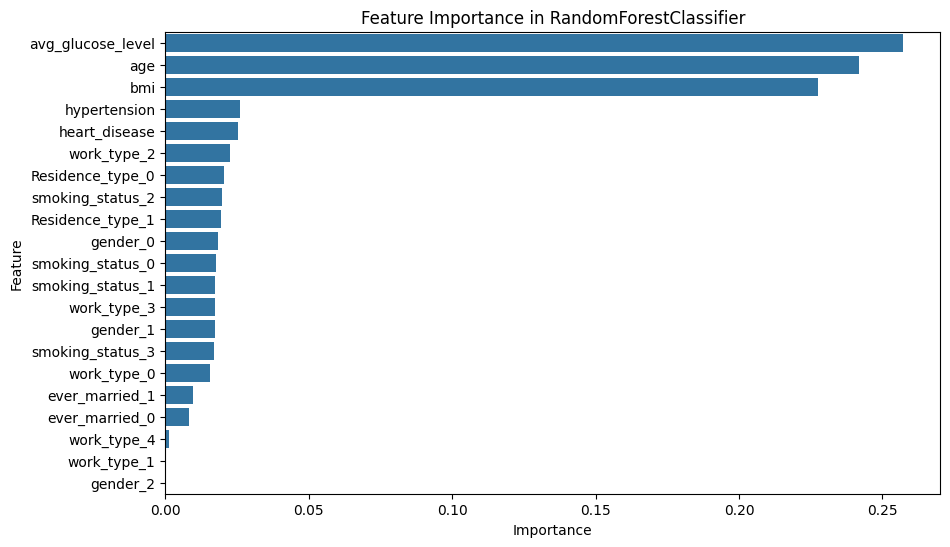

In [40]:
# 피처 중요도 추출
importances = rf_clf.feature_importances_

# 중요도를 DataFrame으로 변환
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# 6. 중요도 순으로 정렬
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# 7. 피처 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature')
plt.title('Feature Importance in RandomForestClassifier')
plt.show()

# XGBClassifier로 모델만들고 예측하기
- https://xgboost.readthedocs.io/en/stable/
- 한글 정리문서 : https://wooono.tistory.com/97

In [41]:
from xgboost import XGBClassifier
# xgb_clf = XGBClassifier()
xgb_clf = XGBClassifier(objective='binary:logistic')

xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('accuracy :', accuracy)

accuracy : 0.9403131115459883


In [42]:
# classification_report() 결과 출력
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred)
print(f"XGBClassifier roc_auc : {roc_auc}")

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.18      0.06      0.09        50

    accuracy                           0.94      1022
   macro avg       0.56      0.52      0.53      1022
weighted avg       0.92      0.94      0.93      1022

XGBClassifier roc_auc : 0.522798353909465


In [43]:
from sklearn.metrics import roc_auc_score

# y_true: 실제 타깃값 (0 또는 1로 이루어진 배열)
# y_pred: 예측된 확률값 (0과 1 사이의 확률로 이루어진 배열)
roc_auc = roc_auc_score(y_test, y_pred)
print(roc_auc)

0.522798353909465


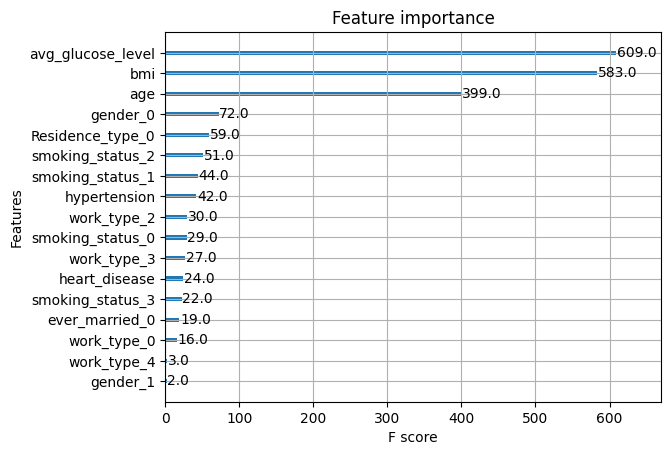

In [44]:
#xgboost의 강력한 기능 Feature Importance 확인
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(xgb_clf)
pyplot.show()

# Light GBM
- 공식 문서 : https://lightgbm.readthedocs.io/en/v3.3.2/
- pip install lightgbm